In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mmsno
from collections import Counter
import geopandas as gpd

#load dataset
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [29]:
df = sns.load_dataset('taxis')
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [9]:
# Investigating missing data
null_vals = df.isnull().sum()
null_vals

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [ ]:
#Viz missing data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), annot=True, cmap='coolwarm')
mmsno.bar(df, color='blue')

In [21]:
# Viz where there are missing data in the dataset
df.isnull()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6429,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6430,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# Drop or remove the missing rows in the dataset
df.dropna(inplace=True)

In [23]:
# Check if the rows with no data were successfully removed
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [24]:
# Cleaned dataset - first 5 rows
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [25]:
# Cleaned dataset - bottom 5 rows
df.tail(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [28]:
df.shape

(6341, 14)

In [31]:
# Viz to describe the dataset's measure of central tendency (descriptive statistics)
df.describe()

,passengers,distance,fare,tip,tolls,total
count,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
std,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000


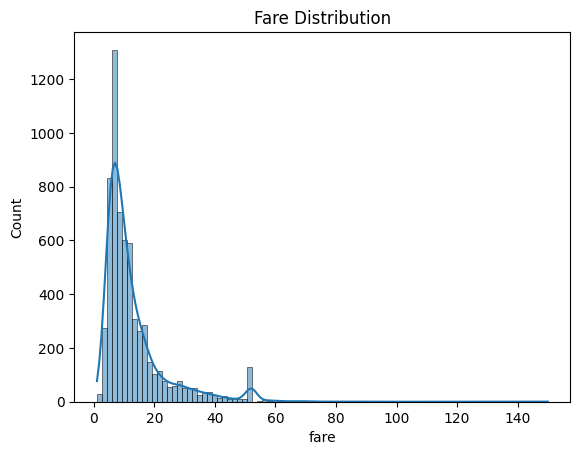

In [72]:
#Viz to show fare distribution analysis
sns.histplot(df['fare'], kde=True, bins=90)
plt.title("Fare Distribution");

The viz shows a histogram chart of fare distribution analysis depicting a right/positive skew with outliers on the right.

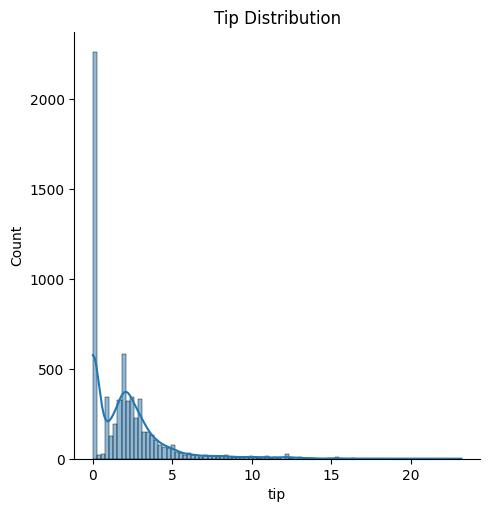

In [76]:
#Distribution of Tip payment
sns.displot(df['tip'], kde=True, bins=90)
plt.title("Tip Distribution");

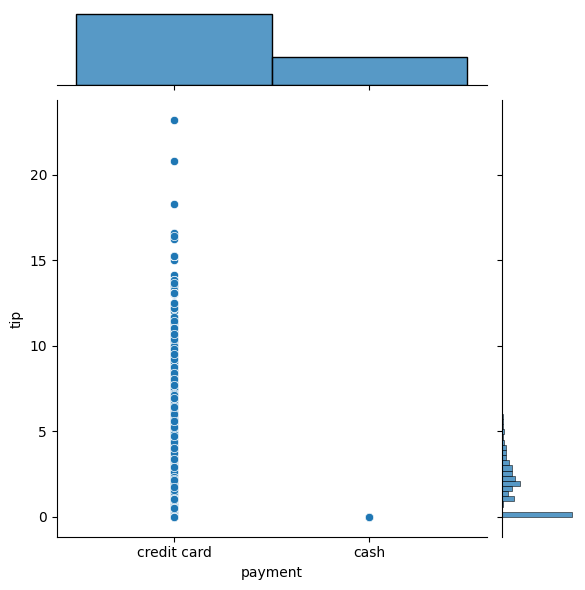

In [51]:
# Viz to highlight Tip Analysis (Relationship between Tip and Payment method)
sns.jointplot(x='payment', y='tip', data=df, kind='scatter');

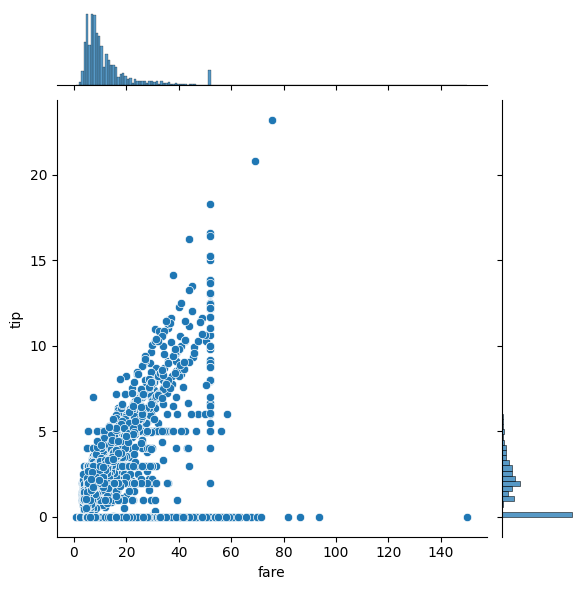

In [54]:
# Viz to highlight Tip Analysis (Relationship between Tip and Fare)
sns.jointplot(x='fare', y='tip', data=df, kind='scatter');

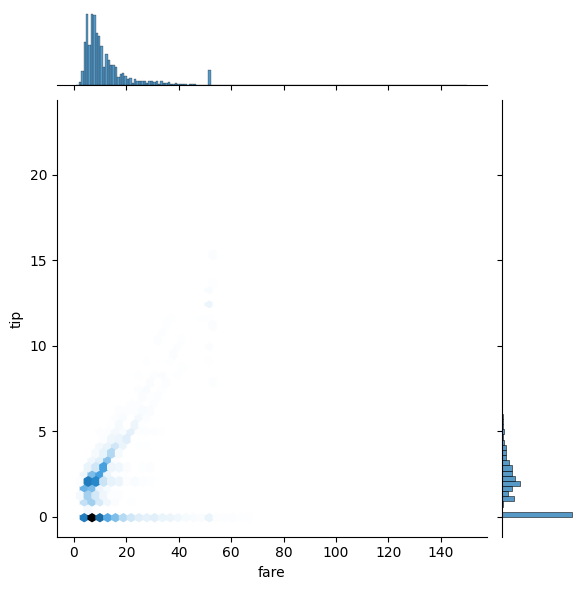

In [55]:
sns.jointplot(x='fare', y='tip', data=df, kind='hex');

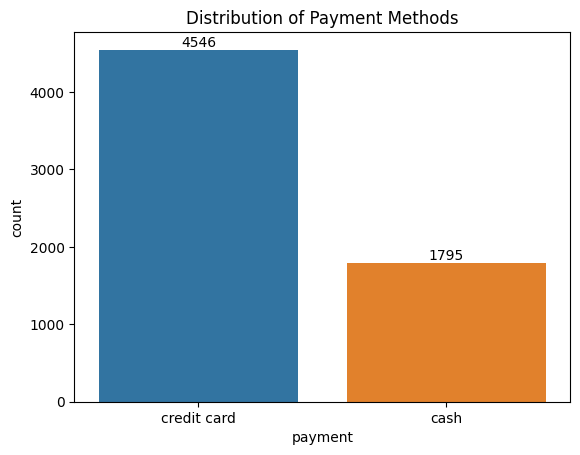

In [71]:
#Viz show payment type analysis
ax=sns.countplot(x=df['payment'], order=df['payment'].value_counts(ascending=False).index)
values=df['payment'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Distribution of Payment Methods");

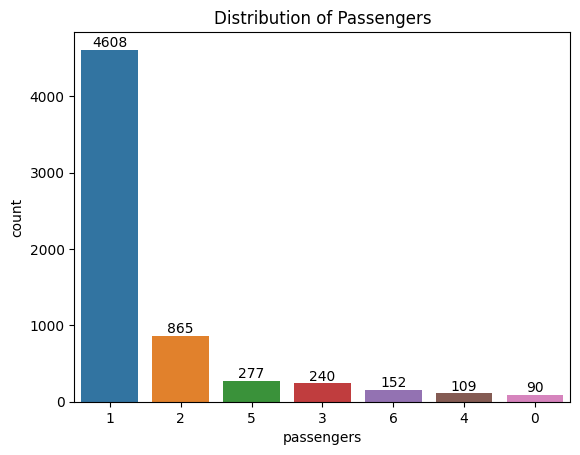

In [74]:
#Viz show passenger analysis
ax=sns.countplot(x=df['passengers'], order=df['passengers'].value_counts(ascending=False).index)
values=df['passengers'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Distribution of Passengers");

In [21]:
#Extract the year, month, quarter
df['year'] = df['pickup'].dt.year
df['month'] = df['pickup'].dt.month
df['day'] = df['pickup'].dt.day

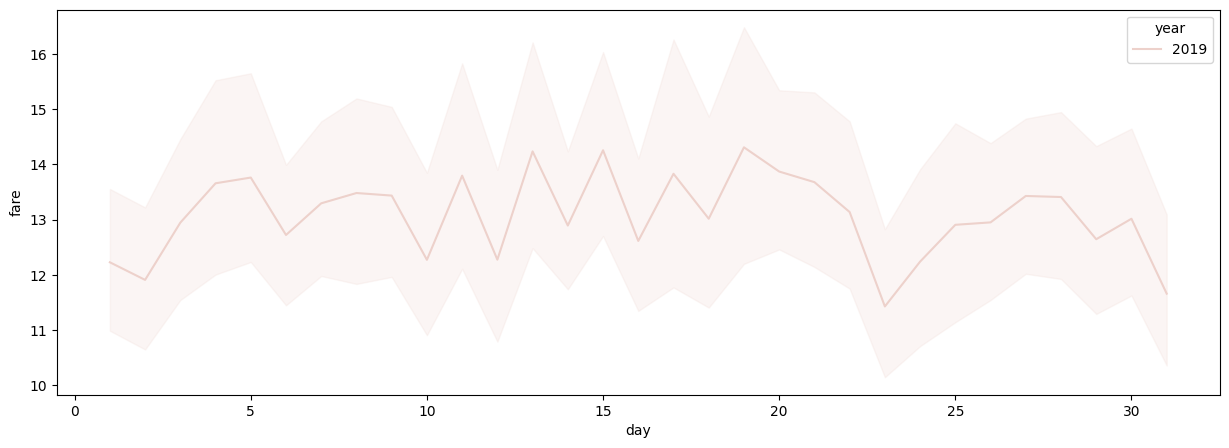

In [19]:
#Time series analysis - Demand overtime based on the pickup timestamp & fare
plt.figure(figsize=(15,5))
sns.lineplot(x='day', y='fare', data=df, hue='year');

Peak pickup periods were recorded in the middle of the month

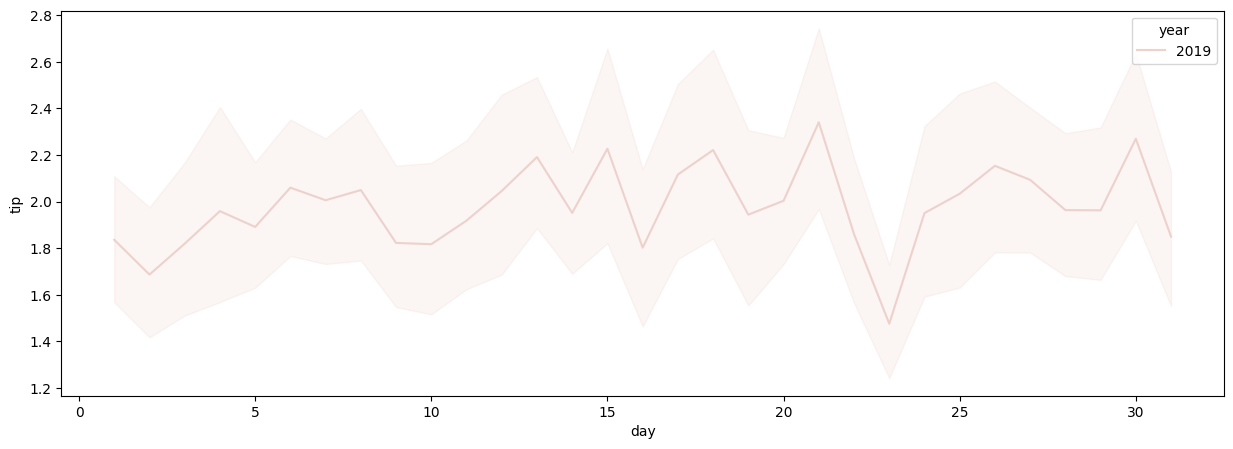

In [18]:
#Time series analysis - Demand overtime based on the pickup timestamp and tip
plt.figure(figsize=(15,5))
sns.lineplot(x='day', y='tip', data=df, hue='year');

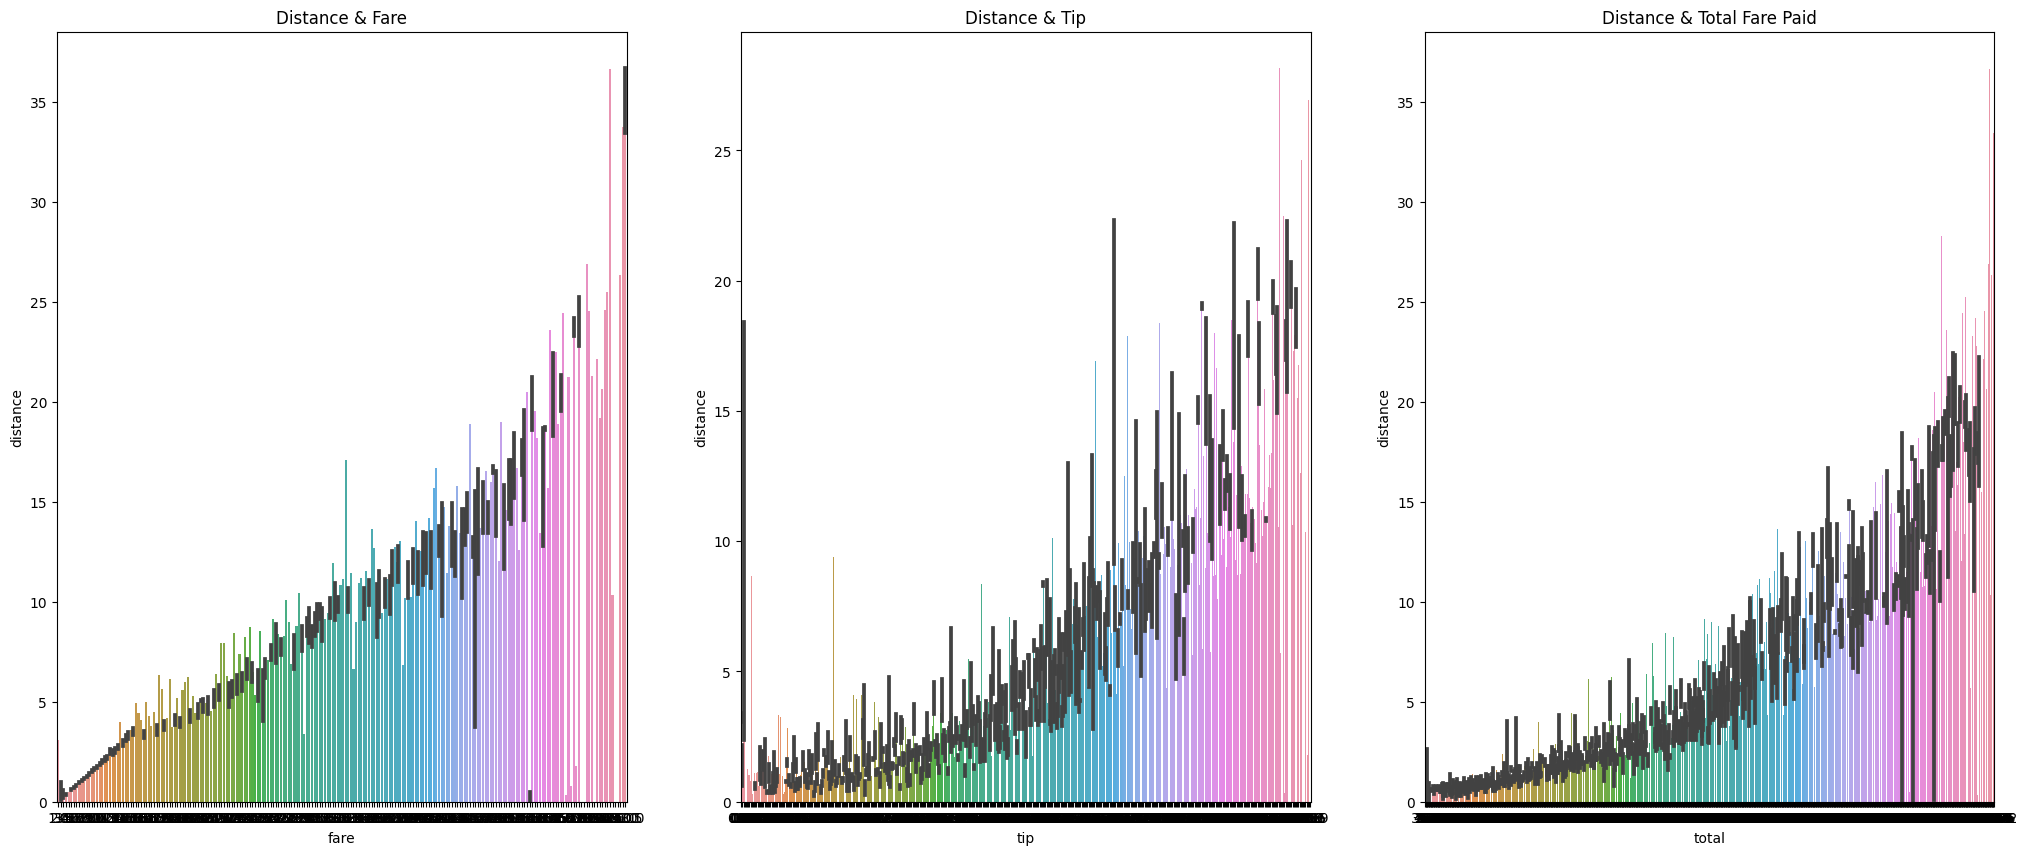

In [30]:
#Viz to show relationship between distance & fare, tip, and total amount paid
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(25,10))
sns.barplot(x="fare", y="distance", data=df, ax=axs[0])
axs[0].set_title("Distance & Fare");

sns.barplot(x="tip", y="distance", data=df, ax=axs[1])
axs[1].set_title("Distance & Tip");

sns.barplot(x="total", y="distance", data=df, ax=axs[2])
axs[2].set_title("Distance & Total Fare Paid");

There's a relationship between distance, fare, tip and total fare paid. Because, as distance increases so also the these other variables increases. The relationship that exists is directly proportional.